# <span style="color:blue">**Capítulo 14**</span>
## <font color=blue size=8> CLARANS </font>
### Clusterización de Conjuntos de Datos Grandes con Búsqueda Aleatorizada (*Clustering Large Datasets with Randomized Search*)

## En Pocas Palabras 

Dado que el algoritmo *K-medoids* es computacionalmente costoso de ejecutar en conjuntos de datos grandes, se introdujo el algoritmo *CLARA* (Clustering for Large Applications) como su extensión. *CLARANS* (Clustering for Large Applications with Randomized Search) va un paso más allá, abordando las desventajas de *K-medoids* para manejar datos espaciales. Logramos esto manteniendo un equilibrio entre el costo computacional y el muestreo aleatorio de los datos.

## Algoritmo CLARA  

*CLARA* aplica el algoritmo *PAM* (Partitioning Around Medoids) sobre una muestra pequeña de datos con un tamaño fijo para generar un número óptimo de medoids para la muestra. Para determinar la calidad del clustering, medimos la disimilitud promedio entre cada objeto en todo el conjunto de datos y su medoid. El proceso de muestreo y clustering se repite un número preespecificado de veces para compensar el sesgo del muestreo.  

El algoritmo se describe de la siguiente manera:  
Repetir el siguiente procedimiento un número fijo de veces:  
1. Seleccionar múltiples subconjuntos de tamaño fijo del conjunto de datos original.  
2. Aplicar el algoritmo *PAM* en cada subconjunto para determinar su medoid.  
3. Calcular la media de las disimilitudes de las observaciones con su medoid más cercano.  
4. Retener como clustering final el subconjunto para el cual la media sea mínima.  

La desventaja de este algoritmo es que si los medoids muestreados están lejos de los mejores medoids, el clustering no será correcto. Raymond Ng y Jiawei Han introdujeron el algoritmo *CLARANS* en octubre de 2002, que añade aleatoriedad en el proceso de selección. A continuación, describiré el algoritmo *CLARANS*.

## Algoritmo CLARANS 

*CLARANS* funciona equilibrando el costo y la efectividad al usar muestras.  

El algoritmo *CLARANS* requiere tres parámetros de entrada:  
- *numlocal* — el número de iteraciones para resolver el problema  
- *maxneighbor* — el número máximo de vecinos que se examinarán  
- *k* — el número de clusters a formar 

El algoritmo se describe de la siguiente manera:  
1. Comenzar con la primera iteración ($i = 1$). Continuar las iteraciones hasta que $i < numlocal$.  
2. Inicializar *mincost* a un número grande (infinito) y *bestnode* a una tupla vacía que se usa para registrar los medoids óptimos.  
3. Seleccionar aleatoriamente $k$ puntos de datos como medoids actuales. Formar los clusters alrededor de estos medoids. Al formar los clusters, considerar solo los *maxneighbor* puntos de datos. Cuando se cruce este límite, comparar el costo actual con *mincost*. Si el costo actual es menor que *mincost*, asignar este valor a *mincost*. Nota que se ha establecido *mincost* como infinito al inicio, por lo que en la primera iteración este intercambio ocurrirá definitivamente. También se asigna *bestnode* al nodo actual, ya que hasta ahora es el mejor encontrado.  
4. Incrementar $i$ y repetir todo el proceso desde los pasos 2 a 4 hasta que $i$ sea menor que el valor preespecificado *numlocal*.  
5. En este punto, la tupla *bestnode* contiene la información sobre el mejor clustering.  

De lo anterior se puede deducir que, al tomar un valor alto para *maxneighbor*, el algoritmo se aproxima a *PAM* y tomará más tiempo en buscar un mínimo local. Esto también resulta en menos mínimos locales con mejor calidad. Por lo tanto, la selección apropiada de valores para estos parámetros permite equilibrar la calidad del clustering y los recursos computacionales requeridos. Cabe mencionar que *CLARANS* es una técnica de clustering en memoria principal, por lo que conservar los recursos se vuelve un aspecto importante al seleccionar los parámetros.  

A continuación, listaré algunas de las principales ventajas de este algoritmo.

## Ventajas  

Algunas ventajas del algoritmo son:  
- *CLARANS* es más eficiente que *PAM* y *CLARA*. Mientras que *CLARA* revisa todos los nodos vecinos, *CLARANS* lo hace solo para *maxneighbor*, resultando en un menor número de búsquedas en comparación con *CLARA*.  
- Idealmente adecuado para conjuntos de datos espaciales de gran tamaño.  
- Comparado con otros métodos (jerárquicos, de partición, basados en densidad y basados en grillas), este método escala mejor en conjuntos de datos grandes e incluso con aumento de la dimensionalidad. Cabe destacar que no utiliza estructuras auxiliares como árboles o grillas y se basa totalmente en búsqueda aleatoria.  
- Como se basa en técnicas de búsqueda local, a diferencia de otros que usan la función de distancia euclidiana, puede utilizar cualquier otra función de medida de distancia arbitraria.  
- Mientras que otras técnicas trabajan con objetos puntuales, *CLARANS* soporta objetos poligonales.  
- En general, *CLARANS* ofrece una mayor calidad de clustering que *CLARA*.  

Cabe mencionar que también existe una desventaja. Dado que *CLARANS* utiliza memoria principal, la eficiencia del algoritmo se ve comprometida cuando se realizan operaciones extensas de E/S. Sin embargo, los autores afirman que clusterizar 1 millón de objetos requeriría poco más de 16 MB de memoria primaria, fácilmente disponible incluso en computadoras personales.  

La biblioteca *sklearn* no proporciona implementación de *CLARANS*. Por lo tanto, se puede usar la implementación disponible en la biblioteca *PyClustering* para demostrar su uso. Para aplicar *CLARANS* sobre un conjunto de datos, se utiliza el siguiente comando:  

```python
clarans_obj = clarans(wine_data, number_clusters=2, numlocal=3, maxneighbor=5)

El primer parámetro es la referencia a tu conjunto de datos. *number_clusters* especifica el número deseado de clusters. El parámetro *numlocal* indica el número de mínimos locales, es decir, el número de iteraciones para ejecutar el algoritmo. *maxneighbor* especifica el número máximo de vecinos a evaluar.  

Como el procesamiento de *clarans* suele tardar bastante en completarse, los diseñadores proporcionaron un método llamado *timedcall* que al final indica el tiempo requerido para la ejecución. Se invoca el proceso de *clarans* pasándolo como argumento a *timedcall*, de la siguiente manera:

```python
(execution_time, res) = timedcall(clarans_obj.process)

Después de que la ejecución se complete, se puede examinar el valor de *execution_time* para conocer el tiempo que tomó el proceso del algoritmo. El método *process* inicia el proceso de clustering. Una vez que finaliza, se obtendrá el número de clusters, los medoids y el mejor medoid. A continuación, mostraré esta sintaxis mediante un proyecto trivial aplicado a un conjunto de datos de la vida real.

## Proyecto

In [26]:
from pyclustering.cluster.clarans import clarans
 # para registrar el tiempo de ejecución
from pyclustering.utils import timedcall
from sklearn import datasets
 # class para graficar datos multidimensionales
from pyclustering.cluster import cluster_visualizer_multidim 
from sklearn.datasets import load_wine

Para este proyecto, usaré el conjunto de datos *wine* proporcionado por la propia biblioteca *sklearn*. Este es un conjunto de datos pequeño, por lo que el algoritmo no requiere demasiado tiempo de procesamiento para clusterizarlo. Se carga el conjunto de datos con el siguiente comando:

In [27]:
dataset =  datasets.load_wine()

El conjunto de datos comprende 13 características que determinan la calidad del vino. Las características se listan utilizando la siguiente instrucción:

In [28]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [29]:
len (dataset.feature_names)

13

Puedes revisar la columna objetivo utilizando la siguiente instrucción:  

In [30]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [31]:
# se convierte el conjunto de datas a una lista
wine_data = dataset.data.tolist()

Después de comprender el diseño del conjunto de datos, apliquemos el algoritmo *CLARANS* para realizar el clustering. Esto se hace con el siguiente fragmento de código:

In [32]:
clarans_instance = clarans(wine_data, number_clusters = 2, numlocal = 3, maxneighbor = 5)
     

El método `process()` analiza los clusters según el algoritmo *CLARANS*. Llamamos al método `process()` y lo encapsulamos dentro de la función `timedcall()` para que también se registre el tiempo que toma ejecutar el método `process()`.

In [33]:
# timedcall() devuelve una tupla que contiene el tiempo de ejecución 
# y el resultado de la ejecución de la función
(execution_time, res) = timedcall(clarans_instance.process);

In [34]:
# imprime el tiempo de ejecución
print("Tiempo de Ejecución : ", execution_time, "\n");

Tiempo de Ejecución :  8.74265359994024 



La ejecución del código anterior tomó unos segundos. Ahora, podemos determinar la asignación de los puntos de datos a los clusters formados. Esto se hace llamando al método `get_clusters` de la siguiente manera:

In [35]:
clusters = clarans_instance.get_clusters()
print("Puntos de datos en cluster 1:\n",clusters[0])
print("Puntos de datos en cluster 2:\n",clusters[1])

Puntos de datos en cluster 1:
 [4, 21, 39, 43, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 177]
Puntos de datos en cluster 2:
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 70, 73, 74, 95, 141, 144, 145, 157, 175, 176]


In [36]:
med = clarans_instance.get_medoids()

También puedes obtener la clase objetivo asociada a cada punto de datos examinando el atributo `target`.  

In [37]:
print("\nClase de etiqueta de cada punto :\n ",dataset.target)


Clase de etiqueta de cada punto :
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [38]:
print("\nÍndice de los mejores medoides : ",med)


Índice de los mejores medoides :  [77, 1]


Además, puedes visualizar los clusters en diferentes dimensiones utilizando el visualizador multidimensional proporcionado en la biblioteca.

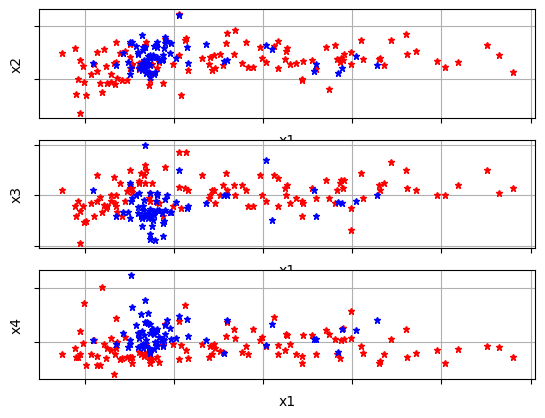

In [39]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters,wine_data,marker="*",markersize=5)
visualizer.show(pair_filter=[[1,2],[1,3],[1,4]],max_row_size=1)

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 14.1</p>

<p>Clustering multidimensional por CLARANS.</p>

La salida muestra el clustering en las dimensiones `x1` versus `x2`, `x3` y `x4`. Puedes extender fácilmente el código para incluir visualizaciones en otras dimensiones.

## Resumen

En este capítulo, estudiaste el algoritmo *CLARANS*. *CLARANS*, que se introdujo como una extensión de *CLARA*, es un algoritmo de clustering para aplicaciones grandes que emplea búsqueda aleatoria mientras maneja datos espaciales. Mantiene un equilibrio entre el costo computacional y el muestreo aleatorio de los datos. Por lo tanto, es ideal para clusterizar conjuntos de datos espaciales de gran tamaño. A diferencia de otros, también soporta objetos poligonales. Permite usar cualquier función de medida de distancia arbitraria y proporciona una alta calidad de clustering. La biblioteca *PyClustering* proporciona su implementación.  
En el siguiente capítulo, aprenderás el algoritmo de clustering de propagación por afinidad (*Affinity Propagation*).
